<a href="https://colab.research.google.com/github/Ian0308/NewsGPT-Ian/blob/main/NewsGPT_Projeto_Ian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação bibliotecas

In [3]:
!pip install beautifulsoup4
!pip install psycopg2
!pip install nltk
!pip install news-please


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.5/905.5 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.6/296.6 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 2.5 MB/s eta 0:00:00
   

# importação de dependências

In [7]:
from bs4 import BeautifulSoup
import psycopg2 as ps
from urllib.request import Request, urlopen
from urllib.error import HTTPError
from datetime import datetime
import time
import random
from newsplease import NewsPlease
from urllib.parse import urlparse
import requests
from urllib.parse import urljoin, urlparse


# conexão com BD

In [3]:
import psycopg2 as ps

def connection():
    host = 'aws-0-us-east-1.pooler.supabase.com'
    database = 'postgres'
    user = 'postgres.uukllbhblupwoaizjsyh'
    inbix = 'AjWlOyZqYNfUsMUY'
    password = 'noticia2025'
    port = 6543

    try:
        conn = ps.connect(
            host=host,
            database=database,
            user=user,
            password=password,
            port=port
        )
    except ps.OperationalError as e:
        raise e
    else:
        return conn
conn = connection()
#print("Conexão bem-sucedida!") if conn else print("Erro na conexão.")


OperationalError: connection to server at "aws-0-us-east-1.pooler.supabase.com" (44.208.221.186), port 6543 failed: FATAL:  Tenant or user not found
connection to server at "aws-0-us-east-1.pooler.supabase.com" (44.208.221.186), port 6543 failed: FATAL:  Tenant or user not found


##Executar gets


In [ ]:
def get_links (url):
  if "cnnbrasil.com.br" in url and ".mp4" not in url:
      req = Request(url)
      page = urlopen(req)
      soup = BeautifulSoup(page, "lxml")
      links = []

      for link in soup.find_all('a'):
          x = str(link.get("href"))
          if ('http' in x) and ('cnn'in x):
              links.append(x)

      return links

#url = "https://www.cnnbrasil.com.br"
#links = get_links(url)

def get_titulo(url):
  news = NewsPlease.from_url(url)
  return news.title

def get_texto(url):
  req = Request(url)

  try:
    page = urlopen(req)
  except HTTPError as e:
    if e.code == 429 or e.code == 999 or e.code == 404:
      wait_time = random.uniform(1,5)
      time.sleep(wait_time)
      return get_texto(url)
    else:
      raise
  soup = BeautifulSoup(page, "lxml")

  conteudo_artigo = soup.find('div', class_='single-content')

  if conteudo_artigo:
    texto = '\n'.join([p.text.strip() for p in conteudo_artigo.find_all('p')])
    return texto
  else:
    return ''

def get_data_publicacao (url):
  req = Request(url)

  try:
    page = urlopen(req)
  except HTTPerror as e:
    if e.code == 429:
      wait.time = random.uniform(1,10)
      time.sleep(wait.time)
      return get_data_publicação(url)
    else:
      raise

  soup = BeautifulSoup(page, "lxml")

  time = soup.find('time', class_="single-header__time", attrs={'datetime': True})

  if time:
    data_str = time['datetime']
    data_publicacao = datetime.fromisoformat(data_str)
    return data_publicacao
  else:
    return None

def coleta_categoria(url):
    """
    Extrai a categoria de uma URL da CNN Brasil, se aplicável.
    Exemplo:
    https://www.cnnbrasil.com.br/politica/alguma-noticia -> retorna 'politica'
    Continuar verificações para outras páginas
    """
    try:
        parsed = urlparse(url)
        dominio = parsed.netloc
        caminho = parsed.path.strip("/").split("/")
        #Cria uma lista de categoria
        if "cnnbrasil.com.br" in dominio and len(caminho) >= 1:
            categoria = caminho[0]
            return categoria
    except Exception as e:
        print(f"[ERRO] Falha ao extrair categoria da URL {url}: {e}")

    return "desconhecida"


##Executar ciração de fila - inserção


In [1]:

def get_existing_links():
    conn = connection()
    cursor = conn.cursor()
    cursor.execute("SELECT url FROM noticia WHERE data_publicacao is not null")
    rows = cursor.fetchall()
    cursor.close()
    conn.close()
    return [row[0] for row in rows]

def coleta_links_da_pagina(url):
    try:
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"
        }
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            base = "{0.scheme}://{0.netloc}".format(urlparse(url))
            links = set()

            for tag in soup.find_all('a', href=True):
                link = urljoin(base, tag['href'])  # Resolve links relativos
                if link.startswith("http"):
                    links.add(link)

            return links
        else:
            print(f"[{response.status_code}] Erro ao acessar {url}")
            return set()
    except Exception as e:
        print(f"Erro ao coletar links da página {url}: {e}")
        return set()

def visita_links():
    conn = connection()
    cursor = conn.cursor()

    urls_origem = get_existing_links()

    for link_origem in urls_origem:
        novos_links = coleta_links_da_pagina(link_origem)

        for novo_link in novos_links:
            try:
                cursor.execute("""
                    INSERT INTO noticia (url, data_visita)
                    VALUES (%s, current_timestamp)
                    ON CONFLICT (url) DO NOTHING
                """, (novo_link,))
                conn.commit()
            except Exception as e:
                print(f"Erro ao inserir o link {novo_link}: {e}")
                conn.rollback()

        # Intervalo para evitar bloqueios
        time.sleep(random.uniform(2, 5))

    cursor.close()
    conn.close()

##Executar upsert

In [ ]:
def upsert()
  conn = connection()
  cursor = conn.cursor()
  cursor.execute("SELECT id, url FROM noticia WHERE data_coleta IS NULL")
  pendentes = cursor.fetchall()

  for noticia_id, url in pendentes:
      titulo = get_titulo(url)
      texto = get_texto(url)
      data_coleta = datetime.now()
      data_publicacao = get_data_publicacao(url)

      if texto.strip():
          titulo = url.split("/")[-2].replace("-", " ").capitalize()
          categoria = categoria = coleta_categoria(url)

          try:
              update_query = """
              UPDATE noticia
              SET titulo = %s,
                  texto = %s,
                  categoria = %s,
                  data_coleta = %s,
                  data_visita = %s,
                  data_publicacao = %s
              WHERE id = %s
              """
              cursor.execute(update_query, (
                  titulo,
                  texto,
                  categoria,
                  data_coleta,
                  data_coleta,
                  noticia_id
              ))
              conn.commit()
              print(f"[OK] Notícia atualizada: {url}")
          except Exception as e:
              conn.rollback()
              print(f"[ERRO] Falha ao atualizar {url}: {e}")
      else:
          print(f"[AVISO] Sem conteúdo em {url}")


#Experimento 01 -  Extração de Relações (Relation Extraction)

In [ ]:
!pip install spacy
!python -m spacy download pt_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 2.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import psycopg2 as ps
import spacy
from spacy.matcher import Matcher



# Carrega modelo em português
nlp = spacy.load("pt_core_news_lg")
matcher = Matcher(nlp.vocab)

# Padrões de relação simples: sujeito - verbo - objeto
pattern = [
    {"DEP": "nsubj"},   # sujeito
    {"POS": "VERB"},    # verbo
    {"DEP": "obj"}      # objeto direto
]
matcher.add("RELACAO_SVO", [pattern])

# Função para extrair relações de uma notícia
def extrair_relacoes(texto):
    doc = nlp(texto)
    relacoes = []
    matches = matcher(doc)
    for match_id, start, end in matches:
        span = doc[start:end]
        relacoes.append(span.text)
    return relacoes

# Pega as notícias
conn = connection()
cur = conn.cursor()
cur.execute("SELECT id, titulo, texto FROM noticia WHERE data_coleta IS NOT NULL LIMIT 20;")
noticias = cur.fetchall()

for id_, titulo, texto in noticias:
  if texto is not None:
    rels = extrair_relacoes(texto[:1000])  # analisa apenas os primeiros 1000 caracteres para otimizar
    print(f"\nNotícia: {titulo}")
    for r in rels:
        print(f"Relação encontrada: {r}")
  else:
    print(f"\nNotícia {titulo}: texto ausente. Pulando extração")


OSError: [E050] Can't find model 'pt_core_news_lg'. It doesn't seem to be a Python package or a valid path to a data directory.

#Experimento 02 -  Reconhecimento de Entidades Nomeadas (NER) com expressões regulares

In [ ]:
import psycopg2 as ps
import re



# Heurística para detectar nomes próprios compostos com iniciais maiúsculas
def detectar_nomes_proprios(texto):
    padrao = r'\b([A-ZÁÉÍÓÚÂÊÎÔÛÃÕ][a-záéíóúâêîôûãõç]+(?:\s+[A-ZÁÉÍÓÚÂÊÎÔÛÃÕ][a-záéíóúâêîôûãõç]+)+)\b'
    encontrados = re.findall(padrao, texto)
    return list(set(encontrados))  # remove duplicatas

# Palavras-chave para detectar organizações e lugares
def detectar_organizacoes(texto):
    padrao = r'\b(?:Universidade|Prefeitura|Ministério|Secretaria|Banco|Tribunal|Assembleia|ONG|Câmara|Instituto)\s+[A-ZÁÉÍÓÚ][\w\s]+'
    encontrados = re.findall(padrao, texto)
    return list(set(encontrados))

def detectar_localizacoes(texto):
    lugares_conhecidos = ['Brasil', 'São Paulo', 'Rio de Janeiro', 'Paraná', 'Amazonas', 'Recife', 'Curitiba', 'Fortaleza']
    encontrados = [lugar for lugar in lugares_conhecidos if lugar in texto]
    return encontrados

# Processamento das notícias
conn = connection()
cur = conn.cursor()
cur.execute("SELECT id, titulo, texto FROM noticia WHERE data_coleta IS NOT NULL LIMIT 5;")
noticias = cur.fetchall()

for id_, titulo, texto in noticias:
  if texto is not None:
    texto_curto = texto[:1000]  # limita a análise para performance
    nomes = detectar_nomes_proprios(texto_curto)
    orgs = detectar_organizacoes(texto_curto)
    locais = detectar_localizacoes(texto_curto)

    print(f"\nNotícia: {titulo}")
    print(f"Nomes próprios detectados: {nomes}")
    print(f"Organizações detectadas: {orgs}")
    print(f"Localizações detectadas: {locais}")
  else:
    print(f"\nNotícia {titulo}: texto ausente. Pulando extração")


#Experimento 3 - Grafo do Conhecimento

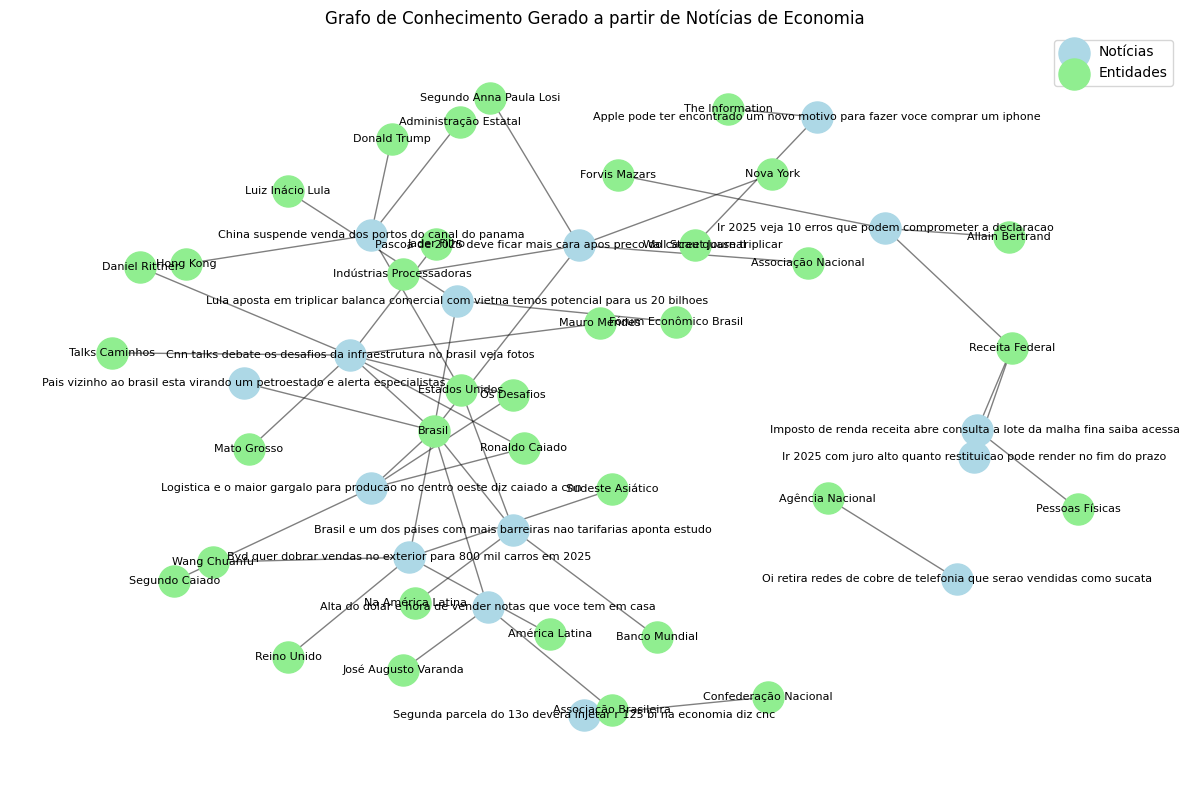

In [ ]:
import psycopg2 as ps
import re
import networkx as nx
import matplotlib.pyplot as plt


# Funções simples de extração de entidades
def detectar_entidades(texto):
    nomes = re.findall(r'\b([A-ZÁÉÍÓÚÂÊÔÃÕ][a-záéíóúâêôãõç]+(?:\s+[A-ZÁÉÍÓÚÂÊÔÃÕ][a-záéíóúâêôãõç]+)+)', texto)
    organizacoes = re.findall(r'\b(?:Universidade|Prefeitura|Ministério|Banco|Secretaria|ONG|Câmara|Instituto)\s+[A-ZÁÉÍÓÚ][\w\s]+', texto)
    lugares = ['Brasil', 'São Paulo', 'Rio de Janeiro', 'Curitiba', 'Fortaleza', 'Recife']
    locais = [lugar for lugar in lugares if lugar in texto]
    return set(nomes + organizacoes + locais)

# Criar o grafo
G = nx.Graph()

# Coletar as notícias
conn = connection()
cur = conn.cursor()
cur.execute("SELECT titulo, texto FROM noticia WHERE data_coleta IS NOT NULL AND categoria = 'economia' LIMIT 15;")
noticias = cur.fetchall()

# Preencher o grafo
for titulo, texto in noticias:
  if texto is not None:
    entidades = detectar_entidades(texto[:1000])  # limitar tamanho por performance
    G.add_node(titulo, type='noticia')
    for entidade in entidades:
        G.add_node(entidade, type='entidade')
        G.add_edge(titulo, entidade)

# Visualizar o grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
noticias_nodes = [n for n in G.nodes if G.nodes[n]['type'] == 'noticia']
entidade_nodes = [n for n in G.nodes if G.nodes[n]['type'] == 'entidade']

nx.draw_networkx_nodes(G, pos, nodelist=noticias_nodes, node_color='lightblue', label='Notícias', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=entidade_nodes, node_color='lightgreen', label='Entidades', node_size=500)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Grafo de Conhecimento Gerado a partir de Notícias de Economia")
plt.axis('off')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 41.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


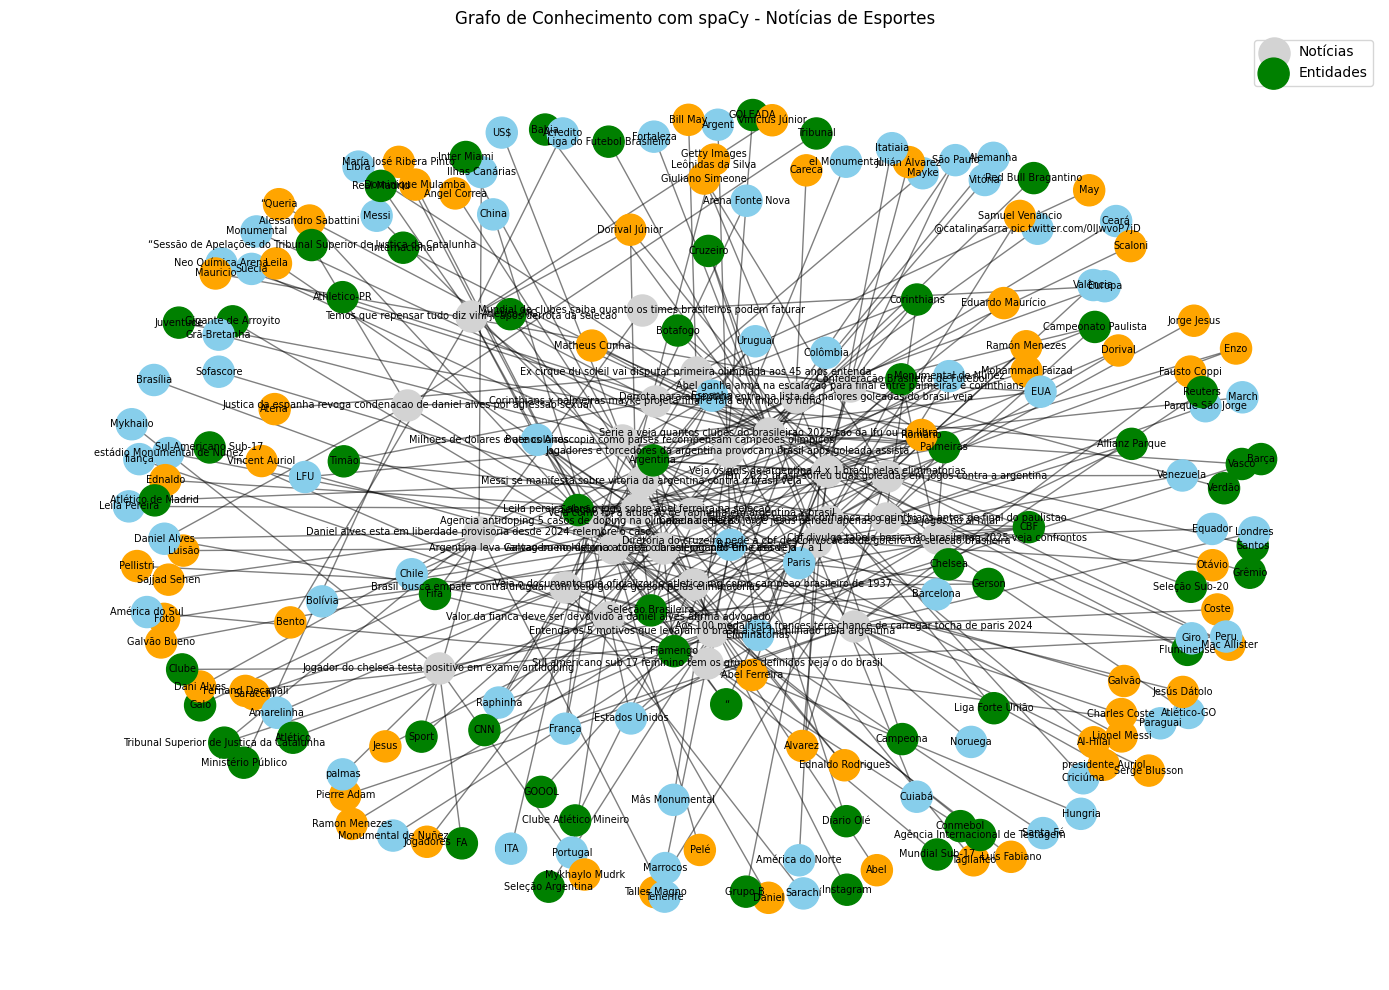

In [ ]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

# Carregar modelo de NER em português (apenas uma vez no início)
nlp = spacy.load("pt_core_news_sm")

# Função para detectar entidades nomeadas com spaCy
def detectar_entidades_spacy(texto):
    doc = nlp(texto[:1000])  # Limita texto por desempenho
    entidades = []
    for ent in doc.ents:
        if ent.label_ in ['PER', 'ORG', 'LOC']:  # Pessoa, Organização, Local
            tipo = {
                'PER': 'pessoa',
                'ORG': 'organizacao',
                'LOC': 'local'
            }[ent.label_]
            entidades.append((ent.text.strip(), tipo))
    return list(set(entidades))

# Criar o grafo
G = nx.Graph()

# Popular o grafo com base nas notícias e entidades
for titulo, texto in noticias:
    if texto:
        entidades = detectar_entidades_spacy(texto)
        G.add_node(titulo, type='noticia')
        for entidade, tipo in entidades:
            G.add_node(entidade, type='entidade', categoria=tipo)
            G.add_edge(titulo, entidade)

# Visualização
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.6)

noticias_nodes = [n for n in G.nodes if G.nodes[n]['type'] == 'noticia']
entidade_nodes = [n for n in G.nodes if G.nodes[n]['type'] == 'entidade']
entidade_colors = [
    {'pessoa': 'orange', 'organizacao': 'green', 'local': 'skyblue'}.get(G.nodes[n].get('categoria'), 'gray')
    for n in entidade_nodes
]

nx.draw_networkx_nodes(G, pos, nodelist=noticias_nodes, node_color='lightgray', node_size=500, label='Notícias')
nx.draw_networkx_nodes(G, pos, nodelist=entidade_nodes, node_color=entidade_colors, node_size=500, label='Entidades')
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=7)

plt.title("Grafo de Conhecimento com spaCy - Notícias de Esportes")
plt.axis('off')
plt.legend()
plt.tight_layout()
plt.show()


#Experimento 04 - Trend de termos - Análise de Tendências Temáticas

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


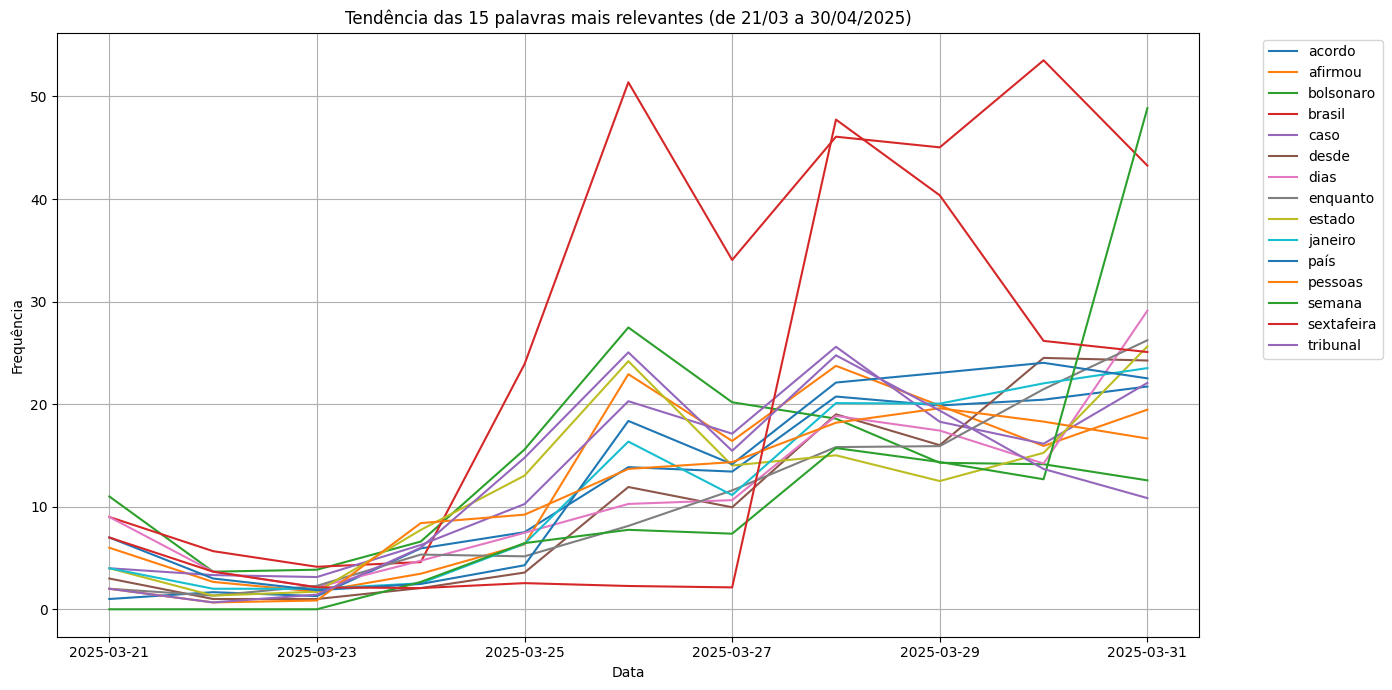

In [ ]:
import psycopg2 as ps
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re

# Baixar stopwords (executar uma vez)
nltk.download('stopwords')
from nltk.corpus import stopwords

# Conexão com o banco
def connection():
    return ps.connect(
        host='aws-0-us-east-1.pooler.supabase.com',
        database='postgres',
        user='postgres.uukllbhblupwoaizjsyh',
        password='noticia2025',
        port=6543
    )

# Função de limpeza com remoção de palavras genéricas
def limpar_texto(texto):
    texto = re.sub(r'[^a-zA-ZÀ-ÿ\s]', '', texto)
    texto = texto.lower()
    palavras = texto.split()

    stop_extra = {
        'anos', 'como', 'entre', 'pode', 'também', 'mais', 'deve', 'ainda', 'nesta', 'sobre',
        'contra', 'após', 'durante', 'primeira', 'segunda', 'sexta', 'sexta-feira', 'disse',
        'governo', 'presidente', 'polícia', 'federal', 'paulo', 'neste', 'nossa', 'além', 'segundo',
        'nós', 'todo', 'todos', 'cada', 'porque', 'quando', 'onde', 'aqui', 'muito', 'muitos'
    }

    todas_stopwords = set(stopwords.words('portuguese')).union(stop_extra)
    palavras_filtradas = [
        p for p in palavras if p not in todas_stopwords and len(p) > 3
    ]
    return palavras_filtradas

# Obter dados do banco
conn = connection()
cur = conn.cursor()
cur.execute("""
    SELECT texto, data_publicacao
    FROM noticia
    WHERE data_coleta IS NOT NULL
      AND texto IS NOT NULL
      AND data_coleta BETWEEN '2025-03-21' AND '2025-04-30'
""")
dados = cur.fetchall()

# Criar DataFrame
df = pd.DataFrame(dados, columns=["texto", "data_publicacao"])
df['data_publicacao'] = pd.to_datetime(df['data_publicacao'], errors='coerce')
df = df.dropna(subset=['data_publicacao'])

# Filtrar exatamente entre 21/03 e 30/04
df = df[(df['data_publicacao'] >= '2025-03-21') & (df['data_publicacao'] <= '2025-04-30')]

# Extrair palavras com data
linhas = []
for _, row in df.iterrows():
    palavras = limpar_texto(str(row['texto'])[:1000])
    for palavra in palavras:
        linhas.append({'data': row['data_publicacao'].date(), 'palavra': palavra})

df_palavras = pd.DataFrame(linhas)

# Contagem por dia e palavra
df_contagem = df_palavras.groupby(['data', 'palavra']).size().reset_index(name='frequencia')

# Top 15 palavras mais relevantes
top_palavras = df_contagem.groupby('palavra')['frequencia'].sum().nlargest(15).index.tolist()
df_top = df_contagem[df_contagem['palavra'].isin(top_palavras)]

# Pivotar e suavizar
df_pivot = df_top.pivot(index='data', columns='palavra', values='frequencia').fillna(0)
df_suavizado = df_pivot.ewm(span=3).mean()

# Plotagem
plt.figure(figsize=(14, 7))
for palavra in df_suavizado.columns:
    plt.plot(df_suavizado.index, df_suavizado[palavra], label=palavra)

plt.title("Tendência das 15 palavras mais relevantes (de 21/03 a 30/04/2025)")
plt.xlabel("Data")
plt.ylabel("Frequência")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df.head()

In [ ]:
import psycopg2 as ps
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
import re

# Baixar stopwords (apenas na primeira vez)
nltk.download('stopwords')
from nltk.corpus import stopwords

# Conexão com o banco
def connection():
    conn = ps.connect(
        host='aws-0-us-east-1.pooler.supabase.com',
        database='postgres',
        user='postgres.uukllbhblupwoaizjsyh',
        password='noticia2025',
        port=6543
    )
    return conn

# Limpeza de texto
def limpar_texto(texto):
    texto = re.sub(r'[^a-zA-ZÀ-ÿ\s]', '', texto)
    texto = texto.lower()
    palavras = texto.split()
    palavras_filtradas = [p for p in palavras if p not in stopwords.words('portuguese') and len(p) > 3]
    return palavras_filtradas

# Obter dados do banco
conn = connection()
cur = conn.cursor()
cur.execute("SELECT texto FROM noticia WHERE data_coleta IS NOT NULL")
dados = cur.fetchall()

# Processar textos
todas_palavras = []
for texto in dados:
    palavras = limpar_texto(str(texto[0])[:2000])  # limitar para otimizar
    todas_palavras.extend(palavras)

# Contar e selecionar top 10
contagem = Counter(todas_palavras)
top_10 = contagem.most_common(10)

# Separar dados para o gráfico
labels = [item[0] for item in top_10]
valores = [item[1] for item in top_10]

# Plotar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 palavras mais frequentes nas notícias")
plt.axis('equal')
plt.tight_layout()
plt.show()
